# Tutorial 6 - Data Analysis with pandas (and dogs)


*Written and revised by Jozsef Arato, Mengfan Zhang, Dominik Pegler*  
Computational Cognition Course, University of Vienna  
https://github.com/univiemops/tewa1-computational-cognition

## This week's lab:

In this tutorial, we will introduce you to one of the most important Python libraries for data analysis: **pandas**. What NumPy is for arrays and matrices, SciPy for various mathematical and statistical functions, and Matplotlib for data visualization, pandas is for analyzing tabular data. The central object in pandas is the **DataFrame** (pandas.DataFrame). Pandas is based on NumPy, but extends its functionality. For example, dataframes have column names, and unlike NumPy's arrays, dataframes can contain different data types (strings, integers, timestamps, etc.). This makes Pandas an ideal tool for analyzing data from psychological questionnaires, for example. Pandas is also highly valued by those transitioning from R because it offers a similar data manipulation experience. Its DataFrame object, along with methods like `groupby`, `merge`, and `pivot_table`, mirror the functionality of R's dplyr and tidyr, making familiar data tasks easier.

In this notebook, we have included many explanations as comments in the code cell. Please read them carefully instead of just pressing the run button.  

**Learning goals:** \
When finishing this tutorial, you should be able to ...
* analyze tabular data using filtering, indexing, grouping
* visualize data in a pandas DataFrame
* combine pandas and NumPy

**Resources:**

https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html


**Deadline:** Day of next lab, 10:00

## Imports and data download

Pandas is usually imported as `pd`.

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests


def download_file(filename, url):
    if not os.path.isfile(filename):
        with requests.get(url) as fo:
            open(filename, "wb").write(fo.content)
        print(f"{filename} downloaded.")
    else:
        print(f"{filename} already available.")


download_file(
    "world_cities.csv",
    "https://ucloud.univie.ac.at/index.php/s/2MX4K4dca47ztGr/download",
)  # original source of dataset https://www.kaggle.com/datasets/juanmah/world-cities

## 1. Create a dataframe and explore the data

A common convention for dataframe names is to use `df` or `df_something`. The `.head()` method shows you the first `n` rows of the dataframe, `.tail()` the last `n` (default for `n` is 5). You can access the column names by `list(df)` or `df.columns`.

In [ ]:
df = pd.read_csv("world_cities.csv")

type(df)

### 1.1. Basic views

In [ ]:
df.head()

In [ ]:
df.tail(8)

If you simply type `df` or `print(df)` it will do a combination of `head()` and `tail()`.

In [ ]:
list(df)

In [ ]:
df.columns

### 1.2. Accessing columns and rows

Columns can be accessed in at least 3 ways:

1) By it's number,
2) by it's name as a string, and
3) by it's name as an attribute.

Although it's often convenient to use the attribute approach, we recommend that you stick to the string approach. You'll see later that this will save you some headaches, especially if you have column names with spaces (which don't work in attributes).

In [ ]:
# 1) Access by column number. This way of indexing is analog to NumPy's indexing

df.iloc[:, 0]  # first column, all rows

In [ ]:
# 2) Access by it's name as an attribute.

df.city

In [ ]:
# 3 a) Access by it's name as a string.

df["city"]

In [ ]:
# 3 b) Access by it's name as a string (loc attribute)

df.loc[:, "city"]  # city column, all rows

As you might have guessed from the comments, (1) and (3) also give you the option to access rows. Oh, and boolean indexing for filtering rows works just as nicely in pandas as it does in NumPy. 

In [ ]:
# e.g. we can use some condition as our boolean index ...

df["capital"] == "primary"

In [ ]:
# ... and place it here as the row index instead of ":"

df.loc[df["capital"] == "primary", "city"]

In [ ]:
# ... the same, but with 2 columns

df.loc[df["capital"] == "primary", ["country", "city"]]

### 1.3. Unique values

To see what the unique values in a column are, you can use the `unique()` method.

In [ ]:
df["capital"].unique()

With `len()` you can see how many countries are included in the dataset.

In [ ]:
len(df["country"].unique())

What else might you be interested in and want to explore?

In [ ]:
#
#
#

### 1.4. Descriptive statistics

Explore dataset properties using pandas' summary features.

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
df.count()

In [ ]:
df.population.max()

### 1.5. Visualize ...

... all cities by latitude and longitude with a scatter plot

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df["lng"], df["lat"], alpha=0.3, s=1)

### 1.6. Use `.sort_values()` method to sort ...

... the values to see which are the southernmost and northernmost cities.


In [ ]:
df.sort_values("lat")

Sort by population in descending order and write the result back to out DataFrame.

In [ ]:
df = df.sort_values("population", ascending=False)

df

## 2. Filtering and indexing the data set

With filtering in pandas, we can identify specific subsets of data, extract rows based on conditions, and focus on specific areas of data. This capability streamlines targeted analysis and data cleaning, helping us effectively isolate outliers and missing values and make informed decisions.

About our data set, we can ask the following questions:

1. How many cities are there in Austria in this dataset?
2. What is the average population of cities in Austria?
3. What is the number of cities in southern vs. northern hemisphere?

In [ ]:
(df["country"] == "Austria").sum()

It is one of the most useful things to memorize how to filter in pandas, although it may not be the most intuitive at first.

In [ ]:
plt.scatter(
    df.loc[df["country"] == "Austria", "lng"],
    df.loc[df["country"] == "Austria", "lat"],
    alpha=0.8,
)

In [ ]:
df.loc[df["country"] == "Austria", "population"].mean()

In [ ]:
df.loc[df["country"] == "Austria", "population"].median()

In [ ]:
# Note that you need to put parentheses around your filtered object, otherwise we would mess up our 0

(df["lat"] > 0).sum()

In [ ]:
(df["lat"] < 0).sum()

In [ ]:
(df["lng"] < 0).sum()

In [ ]:
(df["lng"] > 0).sum()

If you already miss NumPy, you can also do it like this:

In [ ]:
np.sum(df["lng"] > 0)

We can extend our filter statement and add some logic.

(You don't really need to define a separate variable for your filter statement and the criterions - you can just paste everything in directly (just make then sure you put parentheses around each logical entity) - but for clarity, we've defined them as variables here).

In [ ]:
criterion_1 = df["country"] == "Austria"
criterion_2 = df["population"] > 100000
filter_statement = criterion_1 & criterion_2

df.loc[filter_statement]

Same as above, but this time we only want to see the column `city`.

In [ ]:
df.loc[(df["country"] == "Austria") & (df["population"] > 100000), "city"]

Again, if you feel very attached to NumPy, you can also convert your data to NumPy arrays using the `to_numpy()` method or the `values` attribute. Pandas is actually built on top of NumPy, adding a few bells and whistles. And this way we just get the underlying NumPy data.

In [ ]:
df["city"][df["country"] == "Austria"].values

## 3. Data cleaning

With pandas, we can also perform data cleaning with its built-in functions (`.isna()`, `.notna()`, `.fillna()`) for handling missing values, duplicates, and data type conversion, along with the familiar tools for filtering, sorting, and transforming data. `NaN` indicates missing values.

What we can do here:

1. Listing all cities that have no population listed 
2. Drop all cities from the dataframe without population and store them in a new DataFrame
3. Drop small cities (because we only care about big)
4. Replace missing values in the city column with an empty string
5. Check for duplicates

In [ ]:
df["population"].isna()

As you can see, with this method we get a series of boolean values that we can use as a filter. Or we can just do the sum over them to see how many missing values we are dealing with.

In [ ]:
df["population"].isna().sum()

We can also do the opposite and ask how many actual entries we have.

In [ ]:
df["population"].notna().sum()

And we can store this filtered DataFrame in a new DataFrame.

In [ ]:
df_cleaned = df.loc[df["population"].notna()]

df_cleaned

Drop small cities that have a really small population (e.g., under 1,000).

In [ ]:
df_cleaned = df_cleaned.loc[df_cleaned["population"] > 1000]

# After creating a dataframe from a subset of another dataframe, you may want to reindex your rows.

df_cleaned = df_cleaned.reset_index(
    drop=True
)  # we will also drop the old index at the same time

In [ ]:
print(len(df_cleaned), "cities remain.")

The `fillna()` method in Pandas is used to fill missing or NaN values in a DataFrame or Series with a specified value or method. For example, we could fill all city names containing NaN with an empty string.

In [ ]:
# this gives us the number of missing values in the column city

df_cleaned["city"].isna().sum()

In [ ]:
# We replace missing values with an empty string ""

df_cleaned["city"] = df_cleaned["city"].fillna("")

# Quick check

df_cleaned["city"].isna().sum()

Now we want to check whether there are any duplicate entries (all columns identical).

In [ ]:
df_cleaned.duplicated().sum()

Now we want to check whether there are any duplicate entries for the column `city`.

In [ ]:
df_cleaned.duplicated(subset=["city"]).sum()

Let's list them.

In [ ]:
df_cleaned.loc[df_cleaned.duplicated(subset=["city"])].sort_values("city")

Okay, as we can see, the `city` field contains not only unique values, but cities with the same name exist multiple times in other regions. This is good to know. This means that if we want to uniquely identify a city, we need more than just the `city` field.

This is only a part of what pandas has to offer. Now take a look at the pandas documentation and see what the `dropna()` method can do for us and write a short example using our DataFrame.

In [ ]:
#
#
#

## 4. Partial content filtering using `str.contains()` method

We've learned to filter for exact matches using the `==` operator in pandas, but we can also filter for partial content using the `str.contains()` method. This method checks whether each string in a column contains a specified substring. To filter for strings that do **not** contain the specified substring, you can use the `~` (tilde) operator in combination with `str.contains()`. In general, you can use the tilde operator (`~`) to negate or invert your filter, allowing you to select rows or items in your DataFrame or Series that do **not** match the specified conditions.

For example, we want to find all cities that contain the word "Los" as in "Los Angeles" ...

In [ ]:
df_cleaned.loc[df_cleaned["city"].str.contains("Los")]

... or do **not** contain it.

In [ ]:
df_cleaned.loc[~df_cleaned["city"].str.contains("Los")]

## 5. Visualize the primary capitals by location

We will first visualize the positions of the capitals and then do the same, but this time we want the dots to be proportional to the population of the city. Dividing the population by 100,000 seems like a good choice.

In [ ]:
filter_capital = (
    df["capital"] == "primary"
)  # I use a variable here, because it's nicer to define the filter only once

plt.scatter(df.loc[filter_capital, "lng"], df.loc[filter_capital, "lat"])

In [ ]:
plt.scatter(
    df.loc[filter_capital, "lng"],
    df.loc[filter_capital, "lat"],
    s=df.loc[filter_capital, "population"] / 100_000,
)

To take this a bit further, we can also add the names of very large cities (over 10,000,000).

In [ ]:
plt.scatter(
    df.loc[filter_capital, "lng"],
    df.loc[filter_capital, "lat"],
    s=df.loc[filter_capital, "population"] / 100_000,
)

# get the indices of all values that are True in our filter
indices = np.where(filter_capital)[0]

for i in indices:
    if df["population"][i] > 10_000_000:
        plt.text(df["lng"][i], df["lat"][i], df["city"][i])

Of course, it would be nicer to have a world map as a background in this plot, but you get the idea. 


If you enjoy working with geospatial data, you might also want to take a look at the Python package geopandas (https://geopandas.org).

## 6. `groupby` and `merge`

The `groupby()` method in pandas is a fundamental data analysis tool, primarily used for aggregation and transformation tasks. It allows you to efficiently summarize data using functions such as sum, mean, and count across groups. It also supports data transformation by applying custom functions or creating new functions based on group-level statistics.

The `merge()` method in Pandas is essential for combining different DataFrames based on common columns or indexes. It allows you to perform inner, outer, left, and right joins to merge data from multiple sources. This method is critical for data integration and consolidation, allowing you to combine and align datasets based on specified keys or indexes.

Once you get to know them, you won't want to miss them.

Let's see some examples.

### 6.1. Get the mean population of the listed cities per country

In [ ]:
df.groupby("country", as_index=False)["population"].mean()

### 6.2. You have a second DataFrame ...

... with some new information and want to add this information to your main DataFrame. Let's quickly create such a simple new DataFrame (it holds the new and very important information about continent) ...

In [ ]:
data_dict = {
    "iso_code_2": [
        "US",
        "CA",
        "MX",
        "GB",
        "DE",
        "FR",
        "IT",
        "ES",
        "PT",
        "NL",
        "CH",
        "AT",
        "BE",
        "SE",
        "NO",
        "DK",
        "FI",
        "IE",
        "AU",
        "NZ",
        "JP",
        "KR",
        "CN",
        "IN",
        "BR",
        "AR",
        "CL",
        "CO",
        "PE",
        "ZA",
        "RU",
        "TR",
        "EG",
        "SA",
        "AE",
        "IL",
        "TH",
        "SG",
        "MY",
        "PH",
        "ID",
        "VN",
        "PL",
        "CZ",
        "HU",
        "GR",
        "RO",
        "UA",
        "RS",
    ],
    "continent": [
        "North America",
        "North America",
        "North America",
        "Europe",
        "Europe",
        "Europe",
        "Europe",
        "Europe",
        "Europe",
        "Europe",
        "Europe",
        "Europe",
        "Europe",
        "Europe",
        "Europe",
        "Europe",
        "Europe",
        "Europe",
        "Oceania",
        "Oceania",
        "Asia",
        "Asia",
        "Asia",
        "Asia",
        "South America",
        "South America",
        "South America",
        "South America",
        "South America",
        "Africa",
        "Europe",
        "Asia",
        "Africa",
        "Asia",
        "Asia",
        "Asia",
        "Asia",
        "Asia",
        "Asia",
        "Asia",
        "Asia",
        "Asia",
        "Europe",
        "Europe",
        "Europe",
        "Europe",
        "Europe",
        "Europe",
        "Europe",
    ],
}

df_2 = pd.DataFrame(data_dict)
df_2.head()

... and merge it with our main DataFrame. We will merge the two DataFrames along the `iso2` column since this is the mutual information in both DataFrames.

In Pandas, an inner merge combines rows with matching values in both DataFrames, an outer merge combines all rows and fills in missing values with `NaN`s, a left merge includes all rows from the left DataFrame, and a right merge includes all rows from the right DataFrame, each filling in missing values with `NaN`s where there's no match.

Here we decided for a left merge.

In [ ]:
df.merge(df_2, left_on="iso2", right_on="iso_code_2", how="left")

You can try out an inner merge and see how that changes the size of our DataFrame.

In [ ]:
#

## Exercise: Dogs in Vienna

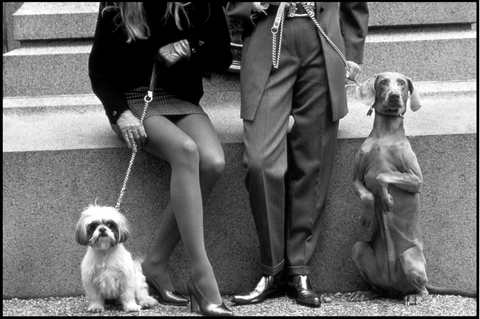

We are in Vienna in the year 2017. Choose a dog breed or a group of dogs and define filter criteria (the `str.contains()` will be of help here, but also the `isin()` method that we haven't discussed so far could be helpful) for your breed/group (inspect the data to get a feeling for it). Then answer the following questions:

1) In which Viennese district (Postal_CODE) are the highest chances that a random person owns a dog of your specific breed/group?
2) In which Viennese district (Postal_CODE) are the highest chances that a random dog is of your specific breed/group?
3) Can you think of a way to visualize it?

**Note: These are two distinct questions and in both datasets you need to filter to the year 2017. If you're not from Vienna, each of Vienna's 23 districts has a name, but also a number. This number is also in the postal code (digits 2 and 3).**

Hint: For 1) and 2) you need to compute proportions. In the first case, the number of your breed divided by the human population (for each district), and in the second case, the number of your breed divided by the total number of all dogs (for each district). 

In [ ]:
vie_dog_url = "https://www.wien.gv.at/gogv/l9ogdhundevie"
vie_population_url = "https://www.wien.gv.at/statistik/ogd/jahrbuch/bevoelkerung/tab_5.1.2_bevoelkerungsstandund-veraenderung_.csv"

df_dogs = pd.read_csv(vie_dog_url, sep=";", encoding="latin1", header=1)
df_pop = pd.read_csv(vie_population_url, sep=";", header=2, index_col=0)

# drop all columns that contain only NaN
df_dogs = df_dogs.dropna(axis=1, how="all")

# drop all rows that contain only NaN
df_pop = df_pop.dropna(axis=0, how="all")

In [ ]:
df_dogs.loc[df_dogs.Ref_Date.astype(str).str[:4] == "2017", "Ref_Date"].unique()

In [ ]:
#
#
#

## Bonus Exercise: Similarities Between Districts

<div class="alert alert-info">No need to complete this one. Just for the interested.</div>

As a social scientist with limited data access (e.g., no election data), use the available dog data to identify which districts share similarities and which are distinct from each other.

1. Define variables based on the dog data; for instance, each dog breed or broader breed category can represent a unique variable with a specific value (either amount or percentage). I.e., a district can score high or low on Poodle.

2. Calculate a similarity measure of your choice for each pair of districts based on all the variables.

3. Compile all pairwise similarity measures into a matrix.

4. Visualize the matrix as a heatmap using `plt.pcolor()` and identify which districts exhibit the most similarities.

**Remember, this is an exploratory exercise with no definitive right or wrong approach, and we haven't done it yet; you would be the first.**

---

If we change our perspective, the data on the distribution of dog breeds across neighborhoods can serve as an analogy in cognitive science and psychology. Just as you analyzed patterns to identify similarities and differences between neighborhoods, you can apply similar methods to behavioral data, examining similarities between concepts such as visual stimuli (and categorizing them or calculating distances between them). This approach, similar to understanding the socioeconomic composition of a neighborhood, provides insight into how people perceive and categorize concepts.

In [ ]:
#
#
#